# Probabilistic Supervised Learning - Naive Bayes(Multinomial)
Create a dataset from the sample given to you(e.g. “Iris”, “Advertising” etc.). Perform the necessary pre-processing steps such as encoding. Train the model using Naive Bayes Classifier for Multinomial predictions. Give new test data and predict the classification output. Handcode the classification probability and compare with the model output. Print the confusion matrix, accuracy, precision, recall, sensitivity, specificity, MCC etc. Analyze and write the inference. 

#### Import libraries and load data

In [1]:
import numpy as np 
import pandas as pd 	
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split



#### Loading Dataset

In [2]:
print("Titanic Dataset:")
df = pd.read_csv(r"./Datasets/titanic.csv")
df.drop(['Parents/Children Aboard','Name','Fare'],inplace=True,axis=1)
df['Sex']=df['Sex'].map({
 'male':1,
 'female':0,
})
df.head()


Titanic Dataset:


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard
0,0,3,1,22.0,1
1,1,1,0,38.0,1
2,1,3,0,26.0,0
3,1,1,0,35.0,1
4,0,3,1,35.0,0


In [3]:
X = df.drop(['Pclass'], axis=1)
y = df['Pclass']
print(X[:5])
print()
print(y[:5])

   Survived  Sex   Age  Siblings/Spouses Aboard
0         0    1  22.0                        1
1         1    0  38.0                        1
2         1    0  26.0                        0
3         1    0  35.0                        1
4         0    1  35.0                        0

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64


#### Splitting the dataset

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#### Implementing Naive-Bayers Algorithm

In [5]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

#### Predicting

In [6]:
y_pred = classifier.predict(x_test)
print('Predicted Value')
print(y_pred[:5])
print('Actual Value')
print(y_test[:5])

Predicted Value
[3 3 3 1 3]
Actual Value
14     3
158    3
762    1
740    3
482    3
Name: Pclass, dtype: int64


C:\Users\Ayush Jain\AppData\Local\Temp\ipykernel_1572\2381774008.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_test[:5])


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

acc = accuracy_score(y_pred,y_test)
print("Accuracy : ",acc)

Accuracy :  0.6179775280898876


In [8]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[25  2 12]
 [ 9  2 15]
 [22  8 83]]


In [9]:
print('Accuracy : ' , accuracy_score(y_test, y_pred))

from sklearn import metrics

print('Precison  : ' , metrics.precision_score(y_test, y_pred, average="weighted"))
print('Recall Score : ' , metrics.recall_score(y_test, y_pred, average="weighted"))
print('F1 Score : ' , metrics.f1_score(y_test, y_pred, average="weighted"))
print('MCC : ' , metrics.matthews_corrcoef(y_test, y_pred))

Accuracy :  0.6179775280898876
Precison  :  0.6011667639476629
Recall Score :  0.6179775280898876
F1 Score :  0.6032570214774604
MCC :  0.2818948457490423


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.45      0.64      0.53        39
           2       0.17      0.08      0.11        26
           3       0.75      0.73      0.74       113

    accuracy                           0.62       178
   macro avg       0.46      0.48      0.46       178
weighted avg       0.60      0.62      0.60       178



#### Confusion Matrix

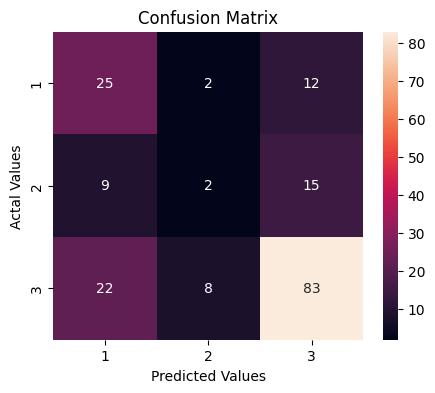

In [12]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()